In [1]:
# Inserted using Find and Add Data tool
# Source: https://apsportal.ibm.com/exchange/public/entry/view/5a7051906b8fe9cc1ba126b53edd948e
import ibmos2spark

# @hidden_cell
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': '0f09c47aaa154431bc217acf73f49de0',
    'region': 'dallas',
    'user_id': 'b43b22f2f417476a8db86cd760ec9eac',
    'username': 'member_654ed1c45551e81b6de85bd4b33f229605528833',
    'password': 'c.dBh4xgp&6Ibt-_'
}

configuration_name = 'os_421ecb8643774e1390561b92cecb464c_configs'
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(bmos.url('suryaTestMLProject', 'NYPD_Motor_Vehicle_Collisions.csv'))
df_data_1.take(5)


[Row(DATE=u'09/23/2017', TIME=u'0:00', BOROUGH=u'BRONX', ZIP CODE=u'10452', LATITUDE=u'40.836796', LONGITUDE=u'-73.92231', LOCATION=u'(40.836796, -73.92231)', ON STREET NAME=None, CROSS STREET NAME=None, OFF STREET NAME=u'1240      GRANT HIGHWAY                 ', NUMBER OF PERSONS INJURED=u'0', NUMBER OF PERSONS KILLED=u'0', NUMBER OF PEDESTRIANS INJURED=u'0', NUMBER OF PEDESTRIANS KILLED=u'0', NUMBER OF CYCLIST INJURED=u'0', NUMBER OF CYCLIST KILLED=u'0', NUMBER OF MOTORIST INJURED=u'0', NUMBER OF MOTORIST KILLED=u'0', CONTRIBUTING FACTOR VEHICLE 1=u'Aggressive Driving/Road Rage', CONTRIBUTING FACTOR VEHICLE 2=u'Unspecified', CONTRIBUTING FACTOR VEHICLE 3=None, CONTRIBUTING FACTOR VEHICLE 4=None, CONTRIBUTING FACTOR VEHICLE 5=None, UNIQUE KEY=u'3755705', VEHICLE TYPE CODE 1=u'MOTORCYCLE', VEHICLE TYPE CODE 2=u'PASSENGER VEHICLE', VEHICLE TYPE CODE 3=None, VEHICLE TYPE CODE 4=None, VEHICLE TYPE CODE 5=None),
 Row(DATE=u'09/23/2017', TIME=u'0:00', BOROUGH=u'BROOKLYN', ZIP CODE=u'11221'

In [3]:
df_data_1.cache()

DataFrame[DATE: string, TIME: string, BOROUGH: string, ZIP CODE: string, LATITUDE: string, LONGITUDE: string, LOCATION: string, ON STREET NAME: string, CROSS STREET NAME: string, OFF STREET NAME: string, NUMBER OF PERSONS INJURED: string, NUMBER OF PERSONS KILLED: string, NUMBER OF PEDESTRIANS INJURED: string, NUMBER OF PEDESTRIANS KILLED: string, NUMBER OF CYCLIST INJURED: string, NUMBER OF CYCLIST KILLED: string, NUMBER OF MOTORIST INJURED: string, NUMBER OF MOTORIST KILLED: string, CONTRIBUTING FACTOR VEHICLE 1: string, CONTRIBUTING FACTOR VEHICLE 2: string, CONTRIBUTING FACTOR VEHICLE 3: string, CONTRIBUTING FACTOR VEHICLE 4: string, CONTRIBUTING FACTOR VEHICLE 5: string, UNIQUE KEY: string, VEHICLE TYPE CODE 1: string, VEHICLE TYPE CODE 2: string, VEHICLE TYPE CODE 3: string, VEHICLE TYPE CODE 4: string, VEHICLE TYPE CODE 5: string]

In [4]:
type(df_data_1)

pyspark.sql.dataframe.DataFrame

In [5]:
dir(df_data_1)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_jcols',
 '_jdf',
 '_jmap',
 '_jseq',
 '_lazy_rdd',
 '_sc',
 '_schema',
 '_sort_cols',
 'agg',
 'alias',
 'approxQuantile',
 'cache',
 'coalesce',
 'collect',
 'columns',
 'corr',
 'count',
 'cov',
 'createOrReplaceTempView',
 'createTempView',
 'crosstab',
 'cube',
 'describe',
 'distinct',
 'drop',
 'dropDuplicates',
 'drop_duplicates',
 'dropna',
 'dtypes',
 'explain',
 'fillna',
 'filter',
 'first',
 'foreach',
 'foreachPartition',
 'freqItems',
 'groupBy',
 'groupby',
 'head',
 'intersect',
 'isLocal',
 'isStreaming',
 'is_cached',
 'join',
 'limit',
 'na',
 'orderBy',
 'persist',
 'printSchema',
 'randomSplit',
 'rdd',
 'registerTempTable',
 'repartition',
 'replace',
 'rollup',
 '

In [6]:
print("Records: {}".format(df_data_1.count()))
df_data_1.printSchema()

Records: 1120339
root
 |-- DATE: string (nullable = true)
 |-- TIME: string (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- ZIP CODE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- ON STREET NAME: string (nullable = true)
 |-- CROSS STREET NAME: string (nullable = true)
 |-- OFF STREET NAME: string (nullable = true)
 |-- NUMBER OF PERSONS INJURED: string (nullable = true)
 |-- NUMBER OF PERSONS KILLED: string (nullable = true)
 |-- NUMBER OF PEDESTRIANS INJURED: string (nullable = true)
 |-- NUMBER OF PEDESTRIANS KILLED: string (nullable = true)
 |-- NUMBER OF CYCLIST INJURED: string (nullable = true)
 |-- NUMBER OF CYCLIST KILLED: string (nullable = true)
 |-- NUMBER OF MOTORIST INJURED: string (nullable = true)
 |-- NUMBER OF MOTORIST KILLED: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 1: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 2: strin

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# matplotlib.patches allows us create colored patches, we can use for legends in plots
import matplotlib.patches as mpatches
# seaborn also builds on matplotlib and adds graphical features and new plot types
#adjust settings
%matplotlib inline
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 12)

In [8]:
collisions_df = df_data_1
collisions_pd = collisions_df[collisions_df['LATITUDE'] != 0][['LATITUDE', 'LONGITUDE', 'DATE', 'TIME',
                                                               'BOROUGH', 'ON STREET NAME', 'CROSS STREET NAME',
                                                               'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
                                                               'CONTRIBUTING FACTOR VEHICLE 1']].toPandas()

collisions_pd.columns = ['Latitude', 'Longitude', 'Date', 'Time', 'Borough', 'On Street',
                         'Cross Street', 'Persons Injured', 'Persons Killed', 'Contributing Factor']

collisions_pd['Latitude'] = collisions_pd['Latitude'].astype(float)
collisions_pd['Longitude'] = collisions_pd['Longitude'].astype(float)
collisions_pd['Persons Killed'] = collisions_pd['Persons Killed'].astype(float)
collisions_pd['Persons Injured'] = collisions_pd['Persons Injured'].astype(float)



#divide dataset in accidents which are: fatal, non-lethal but with person damage, non of the above
killed_pd = collisions_pd[collisions_pd['Persons Killed']!=0]
injured_pd = collisions_pd[np.logical_and(collisions_pd['Persons Injured']!=0, collisions_pd['Persons Killed']==0)]
nothing_pd = collisions_pd[np.logical_and(collisions_pd['Persons Killed']==0, collisions_pd['Persons Injured']==0)]

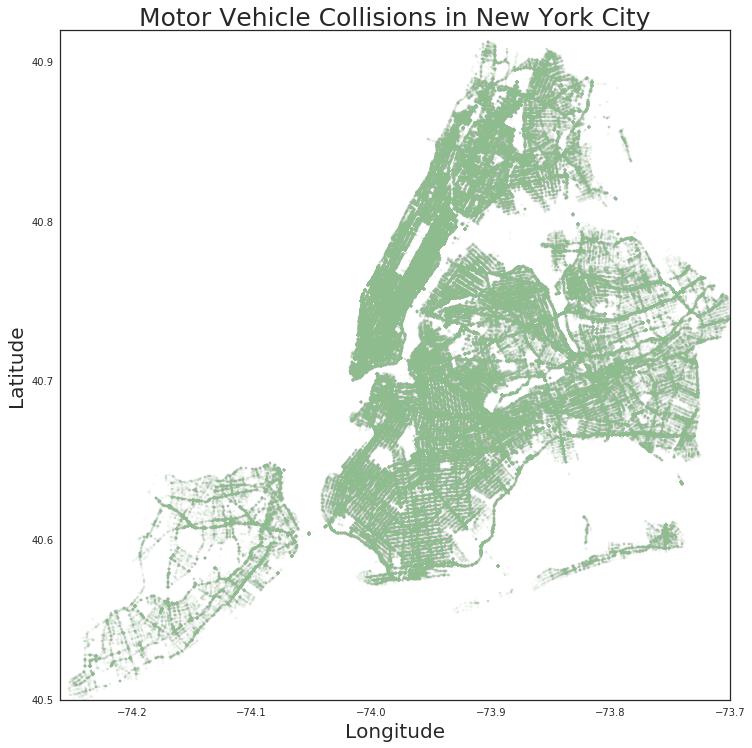

In [9]:
#create scatterplots
plt.scatter(collisions_pd.Longitude, collisions_pd.Latitude, alpha=0.05, s=4, color='darkseagreen')

#adjust more settings
plt.title('Motor Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

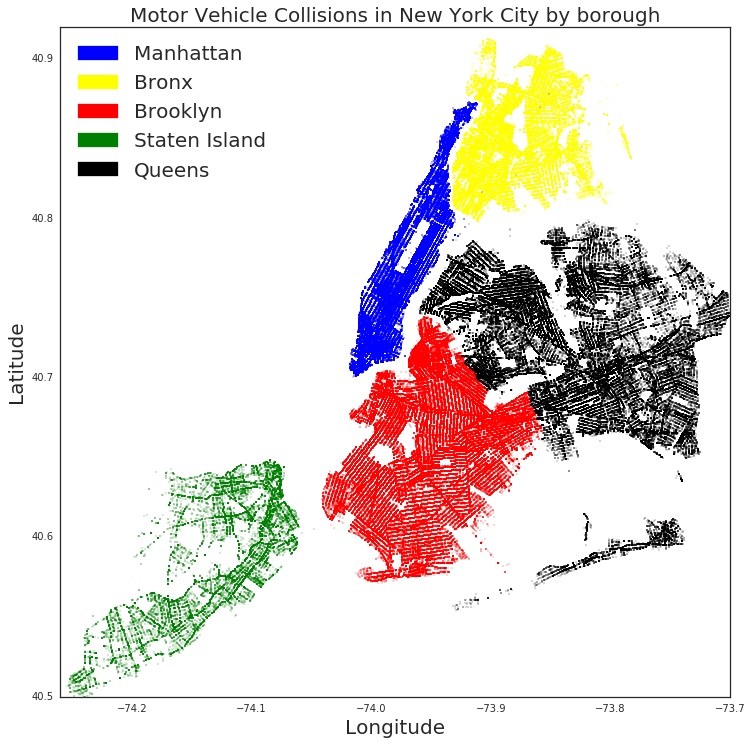

In [10]:
manhattan = collisions_pd[collisions_pd['Borough']=='MANHATTAN']
bronx = collisions_pd[collisions_pd['Borough']=='BRONX']
brooklyn = collisions_pd[collisions_pd['Borough']=='BROOKLYN']
staten = collisions_pd[collisions_pd['Borough']=='STATEN ISLAND']
queens = collisions_pd[collisions_pd['Borough']=='QUEENS']


#create scatterplots
plt.scatter(manhattan.Longitude, manhattan.Latitude, s=1, color='blue', marker ='.')
plt.scatter(bronx.Longitude, bronx.Latitude, s=1, color='yellow', marker ='.')
plt.scatter(brooklyn.Longitude, brooklyn.Latitude, color='red', s=1, marker ='.')
plt.scatter(staten.Longitude, staten.Latitude, s=1, color='green', marker ='.')
plt.scatter(queens.Longitude, queens.Latitude, s=1, color='black', marker ='.')

#create legend
blue_patch = mpatches.Patch(label='Manhattan', color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='Bronx')
red_patch = mpatches.Patch(color='red', label='Brooklyn')
green_patch = mpatches.Patch(color='green', label='Staten Island')
black_patch = mpatches.Patch(color='black', label='Queens')
plt.legend([blue_patch, yellow_patch, red_patch, green_patch, black_patch],
           ('Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'Queens'), 
           loc='upper left', prop={'size':20})

#adjust more settings
plt.title('Motor Vehicle Collisions in New York City by borough', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

In [12]:
borough = collisions_df.groupBy('BOROUGH').count().sort('count').toPandas().iloc[1:,:]
borough['BOROUGH'] = [u'STATEN ISLAND', u'BRONX', u'MANHATTAN', u'QUEENS', u'BROOKLYN', 'NONE']
colors = ['g','0.75','y','k','b','r']
borough.sort_values(by='count', ascending=True)['count'].plot.barh(color=colors)
plt.xlabel('Collisions')
plt.ylabel('Borough')
plt.title('Total Number of Collisions by Borough', size=15)
plt.yticks(range(1,6),borough['BOROUGH'])
plt.tight_layout()
plt.show()

ValueError: Length of values does not match length of index

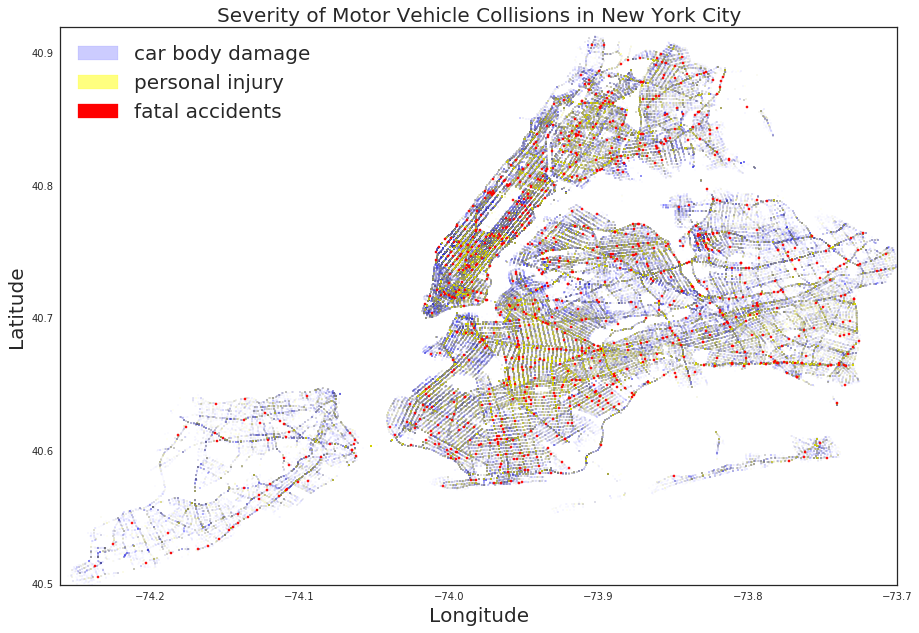

In [13]:
#adjust settings
plt.figure(figsize=(15,10))

#create scatterplots
plt.scatter(nothing_pd.Longitude, nothing_pd.Latitude, alpha=0.04, s=1, color='blue')
plt.scatter(injured_pd.Longitude, injured_pd.Latitude, alpha=0.1, s=1, color='yellow')
plt.scatter(killed_pd.Longitude, killed_pd.Latitude, color='red', s=5)

#create legend
blue_patch = mpatches.Patch( label='car body damage', alpha=0.2, color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='personal injury', alpha=0.5)
red_patch = mpatches.Patch(color='red', label='lethal accidents')
plt.legend([blue_patch, yellow_patch, red_patch],('car body damage', 'personal injury', 'fatal accidents'), 
           loc='upper left', prop={'size':20})

#adjust more settings
plt.title('Severity of Motor Vehicle Collisions in New York City', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.savefig('anothertry.png')

plt.show()

In [15]:
# Clean and shape the data
collisions_header_list = df_data_1.columns[:-4]
collisions_header_list.remove("CONTRIBUTING FACTOR VEHICLE 4")
collisions_header_list.remove("CONTRIBUTING FACTOR VEHICLE 3")
collisions_header_list.remove("CONTRIBUTING FACTOR VEHICLE 5")
collisions_df = collisions_df.dropna(how='any', subset=['ON STREET NAME', 'BOROUGH'])[collisions_header_list]
collisions_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745586 entries, 0 to 745585
Data columns (total 22 columns):
DATE                             745586 non-null object
TIME                             745586 non-null object
BOROUGH                          745586 non-null object
ZIP CODE                         745524 non-null object
LATITUDE                         724159 non-null object
LONGITUDE                        724159 non-null object
LOCATION                         724159 non-null object
ON STREET NAME                   745586 non-null object
CROSS STREET NAME                745586 non-null object
OFF STREET NAME                  58606 non-null object
NUMBER OF PERSONS INJURED        745586 non-null object
NUMBER OF PERSONS KILLED         745586 non-null object
NUMBER OF PEDESTRIANS INJURED    745586 non-null object
NUMBER OF PEDESTRIANS KILLED     745586 non-null object
NUMBER OF CYCLIST INJURED        745586 non-null object
NUMBER OF CYCLIST KILLED         745586 non-null o

In [16]:
# Spatial and temporal normalization by using Spark
delchars = ''.join(c for c in map(chr, range(256)) if not c.isalnum())
deltable = dict((ord(char), None) for char in delchars) # Python2 unicode
normalization_code = {
    'avenue':'av',
    'ave':'av',
    'avnue': 'av',
    'street': 'st',
    'road': 'rd',
    'boulevard': 'blvd',
    'place': 'pl',
    'plaza': 'pl',
    'square': 'sq',
    'drive': 'dr',
    'lane': 'ln',
    'parkway': 'pkwy',
    'turnpike': 'tp',
    'terrace': 'ter',
    '1st': '1',
    '2nd':'2',
    '3rd': '3',
    '1th': '1',
    '2th': '2',
    '3th': '3',
    '4th': '4',
    '5th': '5',
    '6th': '6',
    '7th': '7', 
    '8th': '8',
    '9th': '9',
    '0th': '0',
    'west ': 'w ',
    'north ': 'n ',
    'east ': 'e ',
    'south ': 's ',
}
def normalize_street(s):
    # Lowercase
    s = s.lower()

    # Delete all non-alphanumeric characters
    if isinstance(s, unicode):
        s = s.translate(deltable)
    else:
        s = s.translate(None, delchars) # Python 2

    # Replace common abbreviations
    for k in sorted(normalization_code.keys()):
        s = s.replace(k, normalization_code[k])

    # Only keep ascii chars
    s = s.encode('ascii', errors='ignore').decode()

    return s

def row_parser(row):
    from datetime import datetime
    
    """
    Spatial and Temporal Normalization
    Returns the location, borough, year, month, day, hour; removes nonalphanumeric characters
    """
    # create a row dictionary
    row_dict = row.asDict()
    
    # temporal
    ## date
    temp = row_dict['DATE']
    hr = row_dict['TIME'].split(":")[0]
    try:
        a = datetime.strptime(temp+" "+hr, '%m/%d/%Y %H')
        dates =  [a]
    except:
        a = datetime.now()
        dates = [a]
    
    # location and borough
    location = normalize_street(row_dict['ON STREET NAME'])
    borough = row_dict['BOROUGH'].lower()
    
    
    # other cols
    others = [row_dict[column] for column in collisions_header_list
             if column not in ["ON STREET NAME", "OFF STREET NAME", "CROSS STREET NAME", "BOROUGH", "DATE", "TIME"]]

       

    # return everything together
    return dates + [location] + [borough] + others

In [18]:
collisions_out_row = row(*(["Time", "Street", "Borough"] + [c for c in collisions_header_list
                      if c not in ["ON STREET NAME", "OFF STREET NAME", "CROSS STREET NAME", "BOROUGH", "DATE", "TIME"]]))
collisions_out_index = list(collisions_out_row)

collisions_out = collisions_df.rdd.map(
    lambda row: collisions_out_row(*(row_parser(row)))).toDF()


NameError: name 'row' is not defined

In [ ]:
collisions_out.toPandas().info()

In [ ]:
# Investigating data attributes
from pyspark.sql.functions import desc

collisions_out_df = collisions_out

factor = collisions_out_df.groupBy('CONTRIBUTING FACTOR VEHICLE 1').count().sort(desc('count')).toPandas()
factor = factor[0:20].sort_index(ascending=False)
factor.plot(kind='barh', legend=False, color='blue', figsize=(14,10))
plt.title('Composition of: ' + 'CONTRIBUTING FACTOR VEHICLE 1', size=20)
plt.xlabel('Count')
plt.yticks(range(len(factor))[::-1], factor['CONTRIBUTING FACTOR VEHICLE 1'][::-1])
plt.show()

In [ ]:
rom collections import Counter

vehicletypecode, vehicletypecoderange = 'VEHICLE TYPE CODE ', range(1,6)
grouping = {
    'TAXI': 'Taxi',
    'AMBULANCE': 'Other',
    'BICYCLE': 'Other',
    'BUS': 'Bus',
    'FIRE TRUCK': 'Other', 
    'LARGE COM VEH(6 OR MORE TIRES)': 'Truck',
    'LIVERY VEHICLE': 'Truck',
    'MOTORCYCLE': 'Other', 
    'OTHER': 'Other',
    'PASSENGER VEHICLE': 'Auto',
    'PICK-UP TRUCK': 'Other',
    'PEDICAB': 'Other', 
    'SCOOTER': 'Other',
    'SMALL COM VEH(4 TIRES) ': 'Truck',
    'SPORT UTILITY / STATION WAGON': 'Auto', 
    'UNKNOWN': 'Other',
    'VAN': 'Auto',
    'UNSPECIFIED': 'Other',
    None: None
}

collisions_out_categories = collisions_out.rdd.map(lambda row:
                   collisions_out_row(*[grouping[row[i]] if collisions_out_index[i].startswith("VEHICLE TYPE CODE")
                                                    else row[i] for i in range(len(row))])
                  ).toDF()

In [ ]:
collisions_transformed_row = Row(*(["Time", "Street", "Borough", "Injured",
                                                "Killed", "Auto", "Bus",
                                                "Truck", "Taxi", "Other", ]))

def transform_involved(row):
    counts = Counter([row[i] for i in range(len(row)) if collisions_out_index[i].startswith("VEHICLE TYPE CODE")])
    return collisions_transformed_row(*([row.asDict()[c] for c in ["Time", "Street", "Borough",
                                                                      "NUMBER OF PERSONS INJURED",
                                                                      "NUMBER OF PERSONS KILLED"]] + 
                                       [counts[x] if x in counts else 0
                                           for x in ['Auto', 'Bus','Truck', 'Taxi', 'Other']]))

collisions_transformed = collisions_out_categories.rdd.map(transform_involved).toDF()

In [ ]:
collisions_transformed_boolean_row = Row(*(["Time", "Street", "Borough",
                                                        "AccidentsWithInjuries",
                                                        "AccidentswithDeaths", "Auto", "Bus",
                                                        "Truck", "Taxi", "Other",
                                                        "Injured", "Killed"]))

collisions_transformed_boolean = collisions_transformed.rdd.map(
    lambda row: collisions_transformed_boolean_row(*([int(row.asDict()[c] > 0) if c in ["Injured",
                                                "Killed"] else row.asDict()[c]
                                                      for c in list(collisions_transformed_row)] + 
                                                    [row.Injured, row.Killed])))

In [ ]:
collisions_transformed_boolean.take(1)

In [ ]:
aggregation_columns = {x:"sum" for x in ["AccidentsWithInjuries", "AccidentswithDeaths",
                                    "Auto", "Bus", "Truck", "Taxi", "Other", "Injured", "Killed"]}
aggregation_columns.update({"*":"count"})

collisions_grouped = collisions_transformed_boolean.toDF().groupBy(
    "Time", "Street", "Borough").agg(aggregation_columns)

# rename columns names
for c in collisions_grouped.columns:
    if c.startswith("sum") or c.startswith("SUM"):
        collisions_grouped = collisions_grouped.withColumnRenamed(c, c[4:-1])
    elif c.startswith("count") or c.startswith("COUNT"):
        collisions_grouped = collisions_grouped.withColumnRenamed(c, "NumberOfAccidents")

In [ ]:
collisions_grouped.take(1)

In [ ]:
from pyspark.sql import functions as F
collisions_final_df = collisions_final
plottingdf = collisions_final_df.groupBy("Borough", "Street").agg(F.sum("NumberOfAccidents").alias("sum(NumberOfAccidents)")).\
sort(F.desc('sum(NumberOfAccidents)')).limit(10).toPandas()
plottingdf[['sum(NumberOfAccidents)']].plot(kind='barh', figsize=(11,7), legend=False)
plt.title('Top 10 Streets with the most accidents', size=20)
plt.xlabel('Count')
plt.yticks(range(10), plottingdf['Street'])
plt.gca().invert_yaxis()
plt.show()

In [ ]:
data1 = collisions_out_df[['Borough', 'Street', 'LATITUDE', 'LONGITUDE']].toPandas()

collisions1 = data1[np.logical_and(data1['Street']=='atlanticav', data1['Borough']=='brooklyn')]
collisions2 = data1[np.logical_and(data1['Street']=='northernblvd', data1['Borough']=='queens')]
collisions3 = data1[np.logical_and(data1['Street']=='brdway', data1['Borough']=='manhattan')]
collisions4 = data1[np.logical_and(data1['Street']=='flatbushav', data1['Borough']=='brooklyn')]
collisions5 = data1[np.logical_and(data1['Street']=='queensblvd', data1['Borough']=='queens')]
collisions6 = data1[np.logical_and(data1['Street']=='2av', data1['Borough']=='manhattan')]
collisions7 = data1[np.logical_and(data1['Street']=='hylanblvd', data1['Borough']=='staten island')]
collisions8 = data1[np.logical_and(data1['Street']=='nostrandav', data1['Borough']=='brooklyn')]
collisions9 = data1[np.logical_and(data1['Street']=='lindenblvd', data1['Borough']=='brooklyn')]
collisions10 = data1[np.logical_and(data1['Street']=='bedfordav', data1['Borough']=='brooklyn')]

#create scatterplots
plt.scatter(data1.LONGITUDE, data1.LATITUDE, s=1, color='darkseagreen')
plt.scatter(collisions1.LONGITUDE, collisions1.LATITUDE, s=2, color='red')
plt.scatter(collisions2.LONGITUDE, collisions2.LATITUDE, color='blue', s=2)
plt.scatter(collisions3.LONGITUDE, collisions3.LATITUDE, s=2, color='magenta')
plt.scatter(collisions4.LONGITUDE, collisions4.LATITUDE, color='orange', s=2)
plt.scatter(collisions5.LONGITUDE, collisions5.LATITUDE, s=2, color='yellow')
plt.scatter(collisions6.LONGITUDE, collisions6.LATITUDE, color='purple', s=2)
plt.scatter(collisions7.LONGITUDE, collisions7.LATITUDE, s=2, color='black')
plt.scatter(collisions8.LONGITUDE, collisions8.LATITUDE, color='chartreuse', s=2)
plt.scatter(collisions9.LONGITUDE, collisions9.LATITUDE, s=2, color='brown')
plt.scatter(collisions10.LONGITUDE, collisions10.LATITUDE, color='darkgreen', s=2)


#create legend
a_patch = mpatches.Patch(color='red', label='Atlantic Avenue')
b_patch = mpatches.Patch(color='blue', label='Northern Boulevard')
c_patch = mpatches.Patch(color='magenta', label='Broadway')
d_patch = mpatches.Patch(color='orange', label='Flatbush Avenue')
e_patch = mpatches.Patch(color='yellow', label='Queens Boulevard')
f_patch = mpatches.Patch(color='purple', label='2nd Avenue')
g_patch = mpatches.Patch(color='black', label='Hylan Boulevard')
h_patch = mpatches.Patch(color='chartreuse', label='Nostrand Avenue')
i_patch = mpatches.Patch(color='brown', label='Linden Boulevard')
j_patch = mpatches.Patch(color='darkgreen', label='Bedford Avenue')

plt.legend([a_patch, b_patch, c_patch, d_patch, e_patch, f_patch, g_patch, h_patch, i_patch, j_patch],
           ('Atlantic Avenue', 'Northern Boulevard', 'Broadway', 'Flatbush Avenue', 'Queens Boulevard', '2nd Avenue',
            'Hylan Boulevard', 'Nostrand Avenue', 'Linden Boulevard', 'Bedford Avenue'), 
           loc='upper left', prop={'size':20})

#adjust more settings
plt.title('Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

In [ ]:
# Determining when the most collisions occurred
from pyspark.sql import functions as F

hourplot = collisions_final_df[['Bus','Truck','Taxi','Other','Hour','Auto']].groupBy('Hour')\
.agg(F.sum("Bus").alias("Bus"), F.sum("Truck").alias("Truck"), F.sum("Taxi").alias("Taxi"),\
F.sum("Other").alias("Other"),F.sum("Auto").alias("Auto")).toPandas()

hourplot[['Bus', 'Truck', 'Taxi', 'Auto']].plot(stacked=True, kind='bar',figsize=(12,8), alpha=1)
#'SUM(Other)',
plt.xlabel('Hour', size=17)
plt.ylabel('Vehicles', size=17)
plt.legend(loc='best', prop={'size':20}, framealpha=0) 
plt.title('Collisions on Road per Hour', size=25)
plt.show()